In [1]:
pip install numpy scikit-learn lime shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 547.6 kB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/45/b9/99ca52bf4442ec9506534d59ec74db5fb45a9bb6430a4fd4781120a249d1/shap-0.42.1-cp310-cp310-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for tqdm from https://files.pythonhosted.org/packages/00/e5/f12a80907d0884e6dff9c16d0c0114d81b8cd07dc3ae54c5e962cc83037e/tqdm-4.66.1-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.6 MB/s eta 0:00:00
  Obtaining dependency information for scikit-image>=0.12 from https://files.pythonhosted.org/packages/e0/f7/0ec3a2fbed785259176eb2eee7b254fc68c653028907602231cc8ba09da0/scikit_image-0.21.0-cp310-cp310-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for numba from https:/

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
import numpy as np

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
import pandas as pd
iris_data = pd.DataFrame(np.c_[iris['data'], iris['target']])


In [4]:
import seaborn as sns

In [5]:
iris_data

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [6]:
iris_data.columns = ['sep_l', 'sep_w','pet_l','pet_w','target']

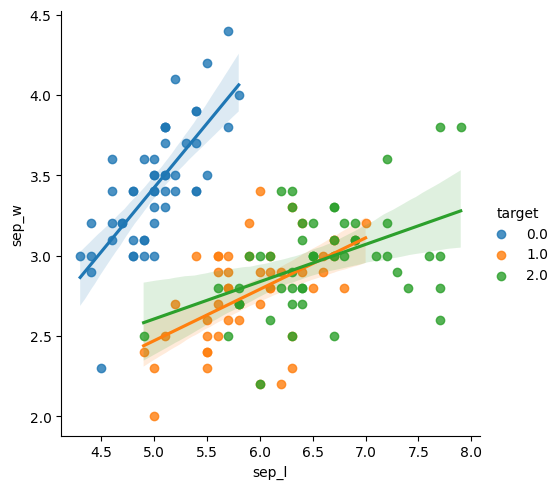

In [7]:
sns.lmplot(x='sep_l',y='sep_w',hue='target',data=iris_data)

In [8]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [9]:
# Random Forest feature importance
rf_importance = rf_model.feature_importances_
print(f"Random Forest Feature Importance: {rf_importance}")

# Logistic Regression feature importance (coefficients)
lr_importance = lr_model.coef_
print(f"Logistic Regression Coefficients: {lr_importance}")

Random Forest Feature Importance: [0.10809762 0.03038681 0.43999397 0.42152159]
Logistic Regression Coefficients: [[-0.39710519  0.96040005 -2.37445011 -1.00316159]
 [ 0.51257066 -0.25280601 -0.21507559 -0.76915118]
 [-0.11546546 -0.70759403  2.5895257   1.77231277]]


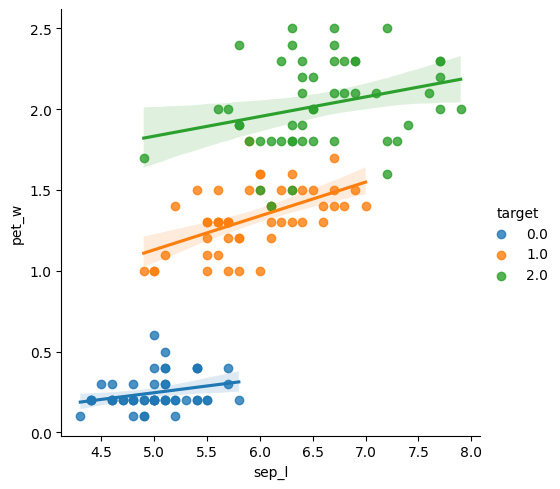

In [10]:
sns.lmplot(x='sep_l',y='pet_w',hue='target',data=iris_data)

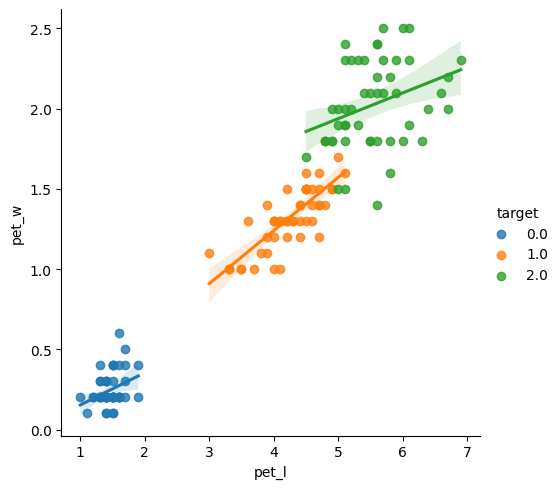

In [11]:
sns.lmplot(x='pet_l',y='pet_w',hue='target',data=iris_data)

In [12]:
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=iris.feature_names, class_names=iris.target_names, discretize_continuous=True)

# Explain a prediction (Random Forest)
i = np.random.randint(0, X_test.shape[0])
exp = explainer.explain_instance(X_test[i], rf_model.predict_proba, num_features=4)
exp.show_in_notebook()

In [13]:
import shap

# Random Forest SHAP
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Explain a prediction (Random Forest)
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][i], X_test[i], feature_names=iris.feature_names)

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [14]:
shap_values[0][i]

array([7.59802904e-02, 1.15454226e-04, 2.92145084e-01, 2.94425838e-01])

In [15]:
X_test[i]

array([4.8, 3. , 1.4, 0.3])

In [16]:
explainer.expected_value[0]

0.33733333333333354

In [17]:
df = pd.read_csv('/Users/mahinbindra/Downloads/Churn_Modelling.csv')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [19]:
df.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [20]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [21]:
import matplotlib.pyplot as plt

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


<Axes: xlabel='Balance', ylabel='Count'>

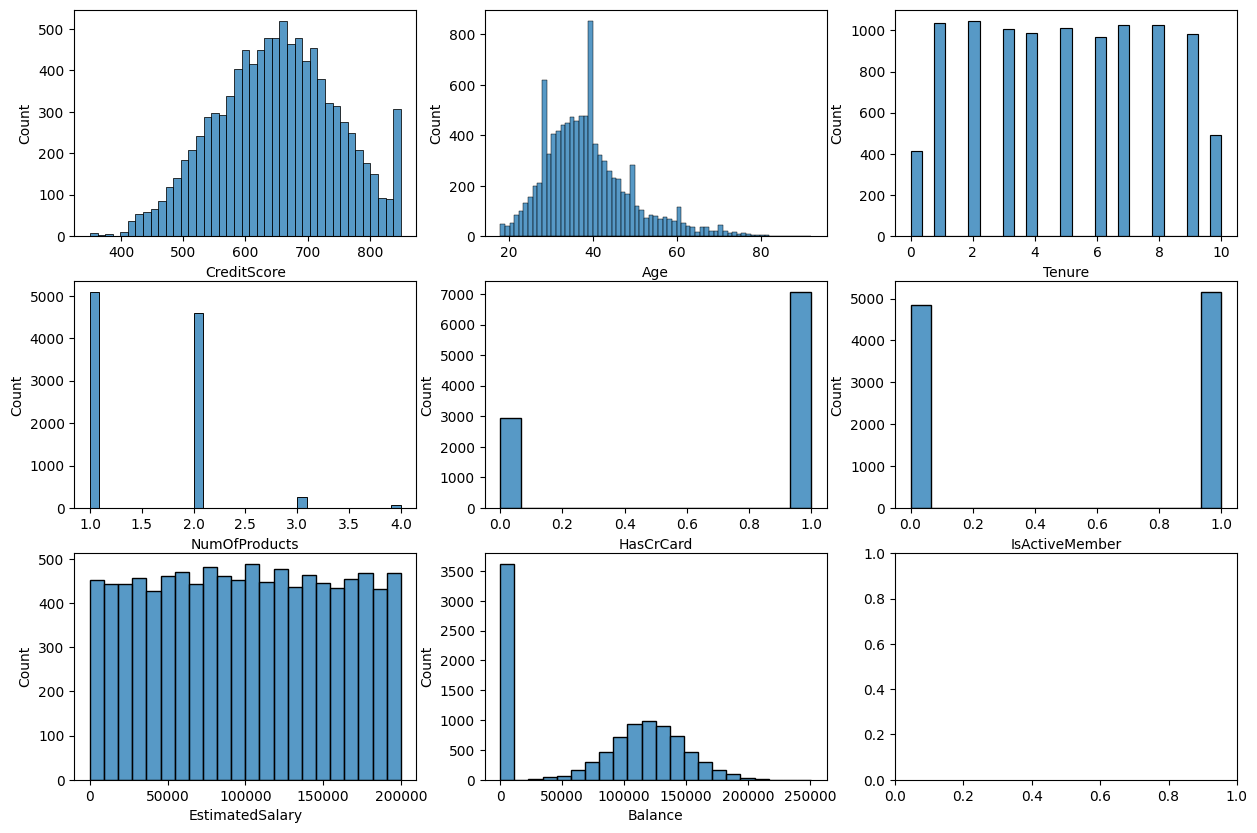

In [35]:
fig, axs = plt.subplots(3,3, figsize = (15,10))
sns.histplot(x = 'CreditScore', data = df, ax = axs[0,0])
sns.histplot(x = 'Age', data = df, ax = axs[0,1])
sns.histplot(x = 'Tenure', data = df, ax = axs[0,2])
sns.histplot(x = 'NumOfProducts', data = df, ax = axs[1,0])
sns.histplot(x = 'HasCrCard', data = df, ax = axs[1,1])
sns.histplot(x = 'IsActiveMember', data = df, ax = axs[1,2])
sns.histplot(x = 'EstimatedSalary', data = df, ax = axs[2,0])
sns.histplot(x = 'Balance', data = df, ax = axs[2,1])

<Axes: xlabel='Exited', ylabel='Balance'>

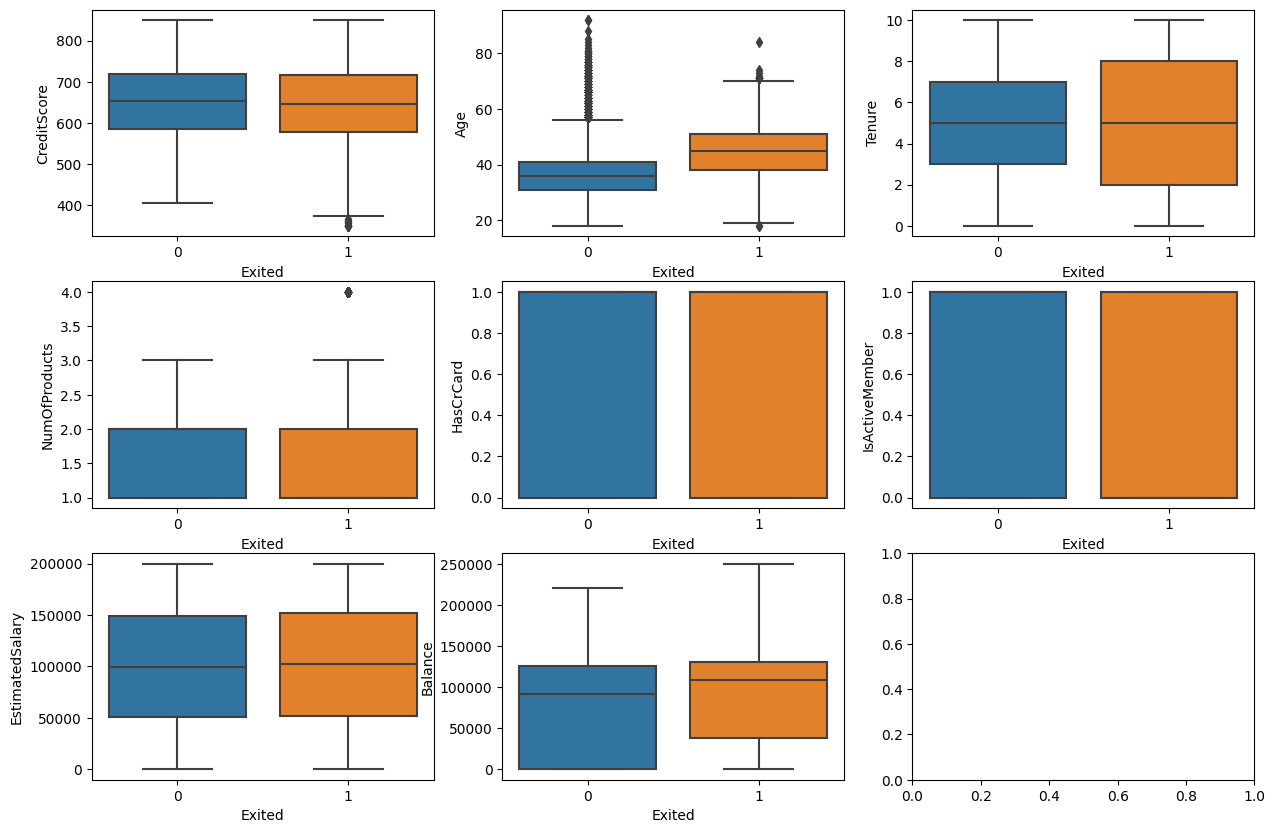

In [30]:
fig, axs = plt.subplots(3,3, figsize = (15,10))
sns.boxplot(y = 'CreditScore', x = 'Exited', data = df, ax = axs[0,0])
sns.boxplot(y = 'Age', x = 'Exited', data = df, ax = axs[0,1])
sns.boxplot(y = 'Tenure', x = 'Exited', data = df, ax = axs[0,2])
sns.boxplot(y = 'NumOfProducts', x = 'Exited', data = df, ax = axs[1,0])
sns.boxplot(y = 'HasCrCard', x = 'Exited', data = df, ax = axs[1,1])
sns.boxplot(y = 'IsActiveMember', x = 'Exited', data = df, ax = axs[1,2])
sns.boxplot(y = 'EstimatedSalary', x = 'Exited', data = df, ax = axs[2,0])
sns.boxplot(y = 'Balance', x = 'Exited', data = df, ax = axs[2,1])


According to the above boxplots age, tenure and balance may be important factors

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [28]:
df.groupby(['Exited', 'Geography'])['CustomerId'].count().unstack()

Geography,France,Germany,Spain
Exited,,,
0,4204,1695,2064
1,810,814,413


In [29]:
df.groupby(['Exited', 'Gender'])['CustomerId'].count().unstack()

Gender,Female,Male
Exited,,
0,3404,4559
1,1139,898


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
import numpy as np

In [32]:
df2 = df.copy()

In [33]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [36]:
num_columns= ['Age' , 'Tenure', 'Balance', 'CreditScore']
cat_columns = ['Geography', 'Gender']
target ='Exited'

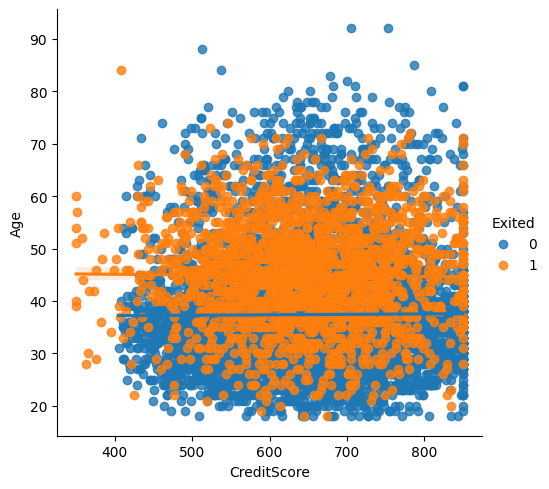

In [52]:
sns.lmplot(x='CreditScore', y='Age',hue='Exited',data=df2)

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import time # to measure how long the models take
from sklearn import datasets
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [38]:
cat_transformer = OneHotEncoder(handle_unknown='ignore')
num_transformer = StandardScaler()
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, cat_columns),
                                                 ('num', num_transformer, num_columns)])

In [39]:
X_train, X_test, y_train, y_test = train_test_split(df2[cat_columns + num_columns], df2[target], test_size=0.1, random_state=42)

In [40]:
x_train_transformed = preprocessor.fit_transform(X_train)
x_test_transformed = preprocessor.fit_transform(X_test)

In [41]:
x_train_transformed.shape

(9000, 9)

In [42]:
x_test_transformed.shape

(1000, 9)

In [43]:
encoded_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_columns)
encoded_columns = encoded_columns.tolist()

In [44]:
all_feat = num_columns + encoded_columns
X_train_transformed = pd.DataFrame(x_train_transformed, columns=all_feat)
X_test_transformed = pd.DataFrame(x_test_transformed, columns=all_feat)

In [53]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_transformed, y_train)

# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_transformed, y_train)

LogisticRegression(random_state=42)

In [54]:
# Random Forest feature importance
rf_importance = rf_model.feature_importances_
print(f"Random Forest Feature Importance: {rf_importance}")

# Logistic Regression feature importance (coefficients)
lr_importance = lr_model.coef_
print(f"Logistic Regression Coefficients: {lr_importance}")

Random Forest Feature Importance: [0.00804051 0.02292656 0.0075759  0.00892946 0.00794249 0.30329462
 0.12373807 0.22239033 0.29516207]
Logistic Regression Coefficients: [[-0.26120854  0.50287292 -0.24197799  0.26711795 -0.26743156  0.67208902
  -0.01561285  0.16714255 -0.08123398]]


convert dataset to an array

In [55]:
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(X_train_transformed, feature_names=encoded_columns.feature_names, class_names=encoded_columns.target_names, discretize_continuous=True)

# Explain a prediction (Random Forest)
i = np.random.randint(0, X_test_transformed.shape[0])
exp = explainer.explain_instance(X_test_transformed[i], rf_model.predict_proba, num_features=4)
exp.show_in_notebook()

AttributeError: 'list' object has no attribute 'feature_names'